# BME-450 Meteorology Project
Caleb Taing, 2/21/2020
Timeframe: 15 May, 2018 23:00:00.000 to 15 May, 2019 23:00:00.000

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
import pytz
import numpy as np
import requests
import datetime as dt
import time 
from datetime import datetime
import datetime
from pandas.plotting import register_matplotlib_converters
import scipy.stats as ss

In [13]:
USERNAME ='OOIAPI-ZKR5O629PC7ULN'
TOKEN= 'TEMP-TOKEN-UBTCW3TSWEG03J'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [14]:
#Arrays for Cross Correlation
OSSM_time = []
OSSM_velocity = []
OSSM_precipitation = []

OOSM_time = []
OOSM_velocity = []
OOSM_precipitation = []

In [15]:
#Time conversion into UTC
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
pst_delta = 8*3600

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone('UTC')
    pst_timezone = pytz.timezone('US/Pacific')
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

In [16]:
data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2019-01-01T00:31:20.712Z&endDT=2019-12-31T00:31:20.712Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2019-01-01T04:33:58.629Z&endDT=2019-12-31T04:33:58.629Z&limit=1000']

# General Averages

In [17]:

def avgSet(time,velocity,precipitation):

    #Defining velocities throughout year
    Jan_velocity = []
    Feb_velocity = []
    March_velocity = []
    April_velocity = []
    May_velocity = []
    June_velocity = []
    July_velocity = []
    Aug_velocity = []
    Sept_velocity = []
    Oct_velocity = []
    Nov_velocity = []
    Dec_velocity = []

    #Defining precipitation rate throughout year
    Jan_precipitation = []
    Feb_precipitation = []
    March_precipitation = []
    April_precipitation = []
    May_precipitation = []
    June_precipitation = []
    July_precipitation = []
    Aug_precipitation = []
    Sept_precipitation = []
    Oct_precipitation = []
    Nov_precipitation = []
    Dec_precipitation = []

    #Defining averages for velocity and precipitation
    avg_velocity = []
    avg_precipitation = []

    Months = ['January',
              'February',
              'March',
              'April',
              'May',
              'June',
              'July',
              'August',
              'September',
              'October',
              'November',
              'December']

    #Repeating loop based on length of time, that defines velocity and precipitation
    #for each existing month by dividing 12
    for i in range(len(time)):
        if i <= int(round((len(time)/12),0)):
            Jan_velocity.append(velocity[i])
            Jan_precipitation.append(precipitation[i])
        elif i > int(round((len(time)/12),0)) and i <= 2*int(round((len(time)/12),0)):
            Feb_velocity.append(velocity[i])
            Feb_precipitation.append(precipitation[i])
        elif i > 2*int(round((len(time)/12),0)) and i <= 3*int(round((len(time)/12),0)):
            March_velocity.append(velocity[i])
            March_precipitation.append(precipitation[i])
        elif i > 3*int(round((len(time)/12),0)) and i <= 4*int(round((len(time)/12),0)):
            April_velocity.append(velocity[i])
            April_precipitation.append(precipitation[i])
        elif i > 4*int(round((len(time)/12),0)) and i <= 5*int(round((len(time)/12),0)):
            May_velocity.append(velocity[i])
            May_precipitation.append(precipitation[i])
        elif i > 5*int(round((len(time)/12),0)) and i <= 6*int(round((len(time)/12),0)):
            June_velocity.append(velocity[i])
            June_precipitation.append(precipitation[i])
        elif i > 6*int(round((len(time)/12),0)) and i <= 7*int(round((len(time)/12),0)):
            July_velocity.append(velocity[i])
            July_precipitation.append(precipitation[i])
        elif i > 7*int(round((len(time)/12),0)) and i <= 8*int(round((len(time)/12),0)):
            Aug_velocity.append(velocity[i])
            Aug_precipitation.append(precipitation[i])
        elif i > 8*int(round((len(time)/12),0)) and i <= 9*int(round((len(time)/12),0)):
            Sept_velocity.append(velocity[i])
            Sept_precipitation.append(precipitation[i])
        elif i > 9*int(round((len(time)/12),0)) and i <= 10*int(round((len(time)/12),0)):
            Oct_velocity.append(velocity[i])
            Oct_precipitation.append(precipitation[i])
        elif i > 10*int(round((len(time)/12),0)) and i <= 11*int(round((len(time)/12),0)):
            Nov_velocity.append(velocity[i])
            Nov_precipitation.append(precipitation[i])
        elif i > 11*int(round((len(time)/12),0)):
            Dec_velocity.append(velocity[i])
            Dec_precipitation.append(precipitation[i])

    #Performs average of every months data repeating throughout for loop
    avg_velocity.append(np.mean(Dec_velocity))
    avg_precipitation.append(np.mean(Dec_precipitation))
    avg_velocity.append(np.mean(Nov_velocity))
    avg_precipitation.append(np.mean(Nov_precipitation))
    avg_velocity.append(np.mean(Oct_velocity))
    avg_precipitation.append(np.mean(Oct_precipitation))
    avg_velocity.append(np.mean(Sept_velocity))
    avg_precipitation.append(np.mean(Sept_precipitation))
    avg_velocity.append(np.mean(Aug_velocity))
    avg_precipitation.append(np.mean(Aug_precipitation))
    avg_velocity.append(np.mean(July_velocity))
    avg_precipitation.append(np.mean(July_precipitation))
    avg_velocity.append(np.mean(June_velocity))
    avg_precipitation.append(np.mean(June_precipitation))
    avg_velocity.append(np.mean(May_velocity))
    avg_precipitation.append(np.mean(May_precipitation))
    avg_velocity.append(np.mean(April_velocity))
    avg_precipitation.append(np.mean(April_precipitation))
    avg_velocity.append(np.mean(March_velocity))
    avg_precipitation.append(np.mean(March_precipitation))
    avg_velocity.append(np.mean(Feb_velocity))
    avg_precipitation.append(np.mean(Feb_precipitation))
    avg_velocity.append(np.mean(Jan_velocity))
    avg_precipitation.append(np.mean(Jan_precipitation))

    return avg_velocity,avg_precipitation,Months


# Generating Wind Speed vs Rain Rate plots

Oregon Shelf Surface Mooring (OSSM) - Surface Buoy


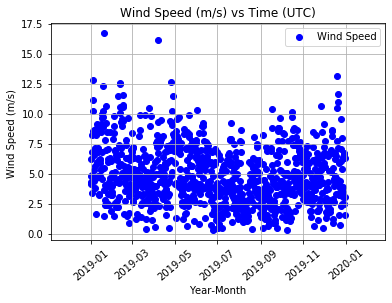

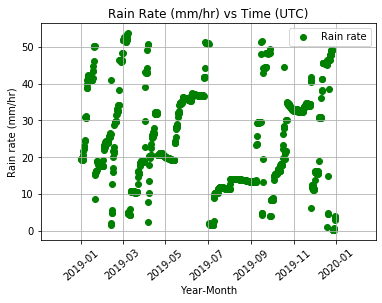

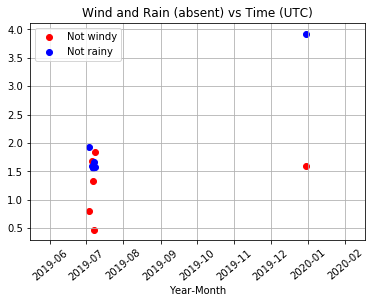

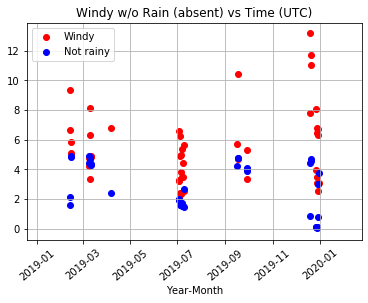

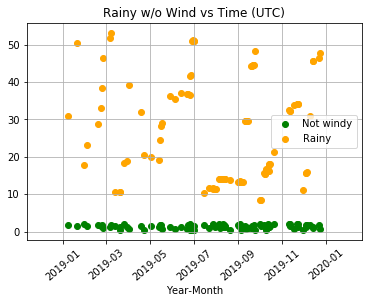

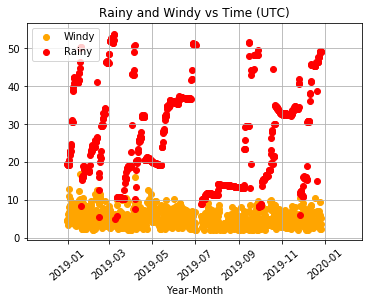

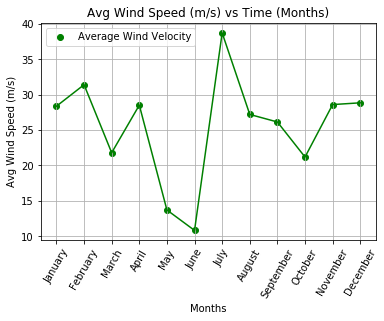

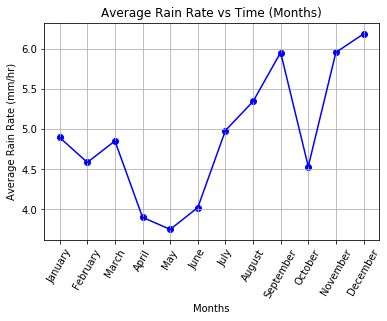

Oregon Offshore Surface Mooring (OOSM) - Surface Buoy


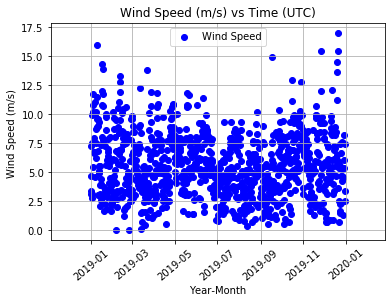

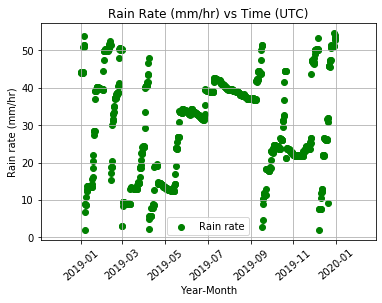

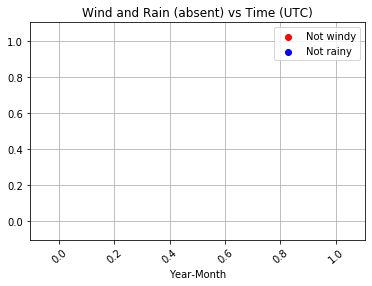

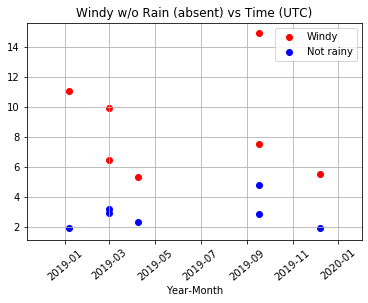

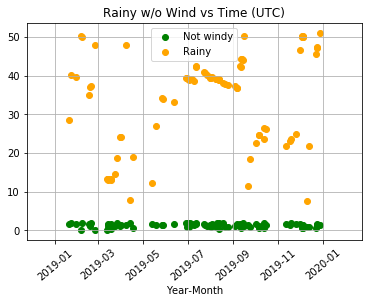

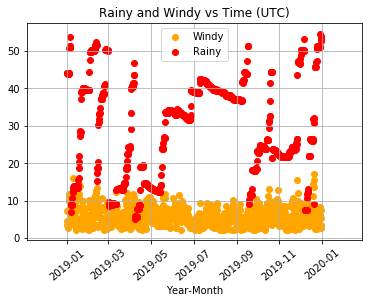

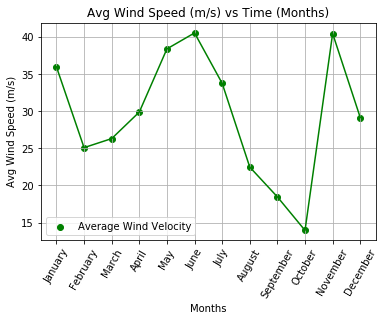

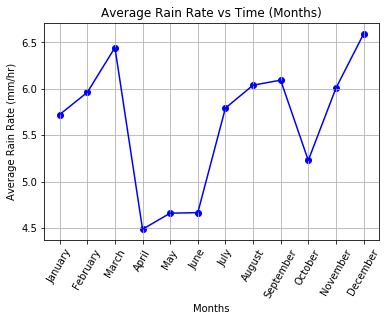

In [18]:
#Repeat based within the number of url's present (2)
for i in range(len(data_request_url)):
    data_request = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = data_request.json()
    time = []
    velocity = []
    precipitation = []
    
    #Defines first url as OSSM
    if i == 0:
        print("Oregon Shelf Surface Mooring (OSSM) - Surface Buoy")
        
    #Defines second url as OOSM
    elif i==1:
        print("Oregon Offshore Surface Mooring (OOSM) - Surface Buoy")
    
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j]['time']))
        
        #Defining resultant velocity based on summation equation
        resultant_velocity = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        velocity.append(resultant_velocity)
        precipitation.append(data[j]['precipitation'])
        
        #Extracts from OSSM url when i=0 to iterate velocity and precipitation
        if i == 0:
            OSSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OSSM_velocity.append(resultant_velocity)
            OSSM_precipitation.append(data[j]['precipitation'])
        
        #Extracts from OOSM url when i=0 to iterate velocity and precipitation
        elif i == 1:
            OOSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OOSM_velocity.append(resultant_velocity)
            OOSM_precipitation.append(data[j]['precipitation'])
            
    
    from numpy import *
    velocity = np.asarray(velocity)
    velocity[isnan(velocity)] = 0
    
    #Case 1: Wind and Rain (Absent)
    time1 = []
    velocity1 = []
    precipitation1 = []
     
    #Case 2: Windy w/o Rain
    time2 = []
    velocity2 = []
    precipitation2 = []
    
    #Case 3: Rainy w/o Wind
    time3 = []
    velocity3 = []
    precipitation3 = []
    
    #Case 4: Rainy and Windy
    time4 = []
    velocity4 = []
    precipitation4 = []
    
    #Repeat based on the length of time (number of cells)
    for i in range(len(time)):
        if velocity[i] < 2 and precipitation[i] < 5:
            #Case 1: Wind and Rain (Absent)
            time1.append(time[i])
            velocity1.append(velocity[i])
            precipitation1.append(precipitation[i])
            
        elif velocity[i] >= 2 and precipitation[i] < 5:
            #Case 2: Windy w/o Rain
            time2.append(time[i])
            velocity2.append(velocity[i])
            precipitation2.append(precipitation[i])
            
        elif velocity[i] < 2 and precipitation[i] >= 5:
            #Case 3: Rainy w/o Wind
            time3.append(time[i])
            velocity3.append(velocity[i])
            precipitation3.append(precipitation[i])
            
        elif velocity[i] >= 2 and precipitation[i] >= 5:
            #Case 4: Rainy and Windy
            time4.append(time[i])
            velocity4.append(velocity[i])
            precipitation4.append(precipitation[i])
            
    # Plot: Wind Speed vs Time
    plt.scatter(time,velocity, color= 'blue',label = 'Wind Speed')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Wind Speed (m/s) ')
    plt.title('Wind Speed (m/s) vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    # Plot: Rain Rate vs Time
    plt.scatter(time,precipitation, color='green',label = 'Rain rate')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Rain rate (mm/hr)')
    plt.title('Rain Rate (mm/hr) vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    
    #Plot: Case 1- Wind and Rain (Absent) vs Time
    plt.scatter(time1,velocity1,color = 'red',label = 'Not windy')
    plt.scatter(time1,precipitation1,color = 'blue',label='Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Wind and Rain (absent) vs Time (UTC)')
    plt.grid(True)
    plt.show()
   
    
    #Plot: Case 2- Windy w/o Rain vs Time
    plt.scatter(time2,velocity2,color = 'red',label='Windy')
    plt.scatter(time2,precipitation2,color = 'blue',label = 'Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Windy w/o Rain (absent) vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    #Plot: Case 3- Rainy w/o Wind vs Time
    plt.scatter(time3,velocity3,color = 'green',label='Not windy')
    plt.scatter(time3,precipitation3,color = 'orange',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy w/o Wind vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    #Plot: Case 4- Rainy and Windy vs Time
    plt.scatter(time4,velocity4,color = 'orange', label='Windy')
    plt.scatter(time4,precipitation4,color = 'red',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and Windy vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    
    
    #calling a avgSet function from previous cell~
    avg = avgSet(time,velocity,precipitation)
    
    #Normalizing velocity and precipitation
    mean_vel=np.mean(velocity)
    mean_precipitate=np.mean(precipitation)
    
    # From return function
    # 0 = Months
    # 1 = Wind Velocity
    # 2 = Rain rate
    plt.scatter(avg[2],avg[1],color='green',label = 'Average Wind Velocity')
    plt.plot(avg[2],avg[1],color='green')
    plt.legend()
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Avg Wind Speed (m/s)')
    plt.title('Avg Wind Speed (m/s) vs Time (Months)')
    plt.grid(True)
    plt.show()
    
    plt.scatter(avg[2],avg[0],color='blue',label = 'Average Rain rate')
    plt.plot(avg[2],avg[0],color='blue')
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Average Rain Rate (mm/hr)')
    plt.title('Average Rain Rate vs Time (Months)')
    plt.grid(True)
    plt.show()

max correlation is 0.6314010061301172 at lag 0 ,which is equal to 0.0 days


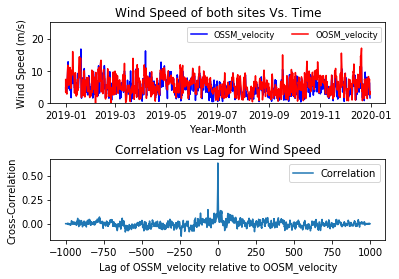

In [20]:
OSSM_velocity = np.asarray(OSSM_velocity)
OSSM_velocity[isnan(OSSM_velocity)] = 0

OOSM_velocity = np.asarray(OOSM_velocity)
OOSM_velocity[isnan(OOSM_velocity)] = 0

y1 = OSSM_velocity
y2 = OOSM_velocity

x = OSSM_time

lags = np.arange(-len(y1)+1 , len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=3)

ax = axs[0]
ax.plot(x, y1, 'b', label='OSSM_velocity')
ax.plot(x, y2, 'r', label='OOSM_velocity')
ax.set_ylim(0, 25)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Wind Speed of both sites Vs. Time')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Year-Month')


ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of OSSM_velocity relative to OOSM_velocity')
ax.set_title('Correlation vs Lag for Wind Speed')

plt.subplots_adjust(hspace=.7)
maxccor = np.max(ccor)
maxlag = lags[np.argmax(ccor)]
days = (maxlag/len(time))*365 #take the ratio and multiply by days in a year
print("max correlation is",str(maxccor),"at lag",maxlag,",""which is equal to",round(days),"days")

Max correlation is at lag 341
Lag in Days: 124
Max correlation is 0.3515930061267975
The x-axis with 2001 points corresponds to all index values in the cross - correlation set


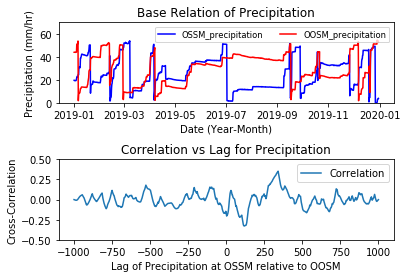

In [23]:
y1 = np.asarray(OSSM_precipitation)
y2 = np.asarray(OOSM_precipitation)

x = OSSM_time

lags = np.arange(-len(y1) + 1, len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='OSSM_precipitation')
ax.plot(x, y2, 'r', label='OOSM_precipitation')
ax.set_ylim(0, 70)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Base Relation of Precipitation')
ax.set_ylabel('Precipitation (mm/hr)')
ax.set_xlabel('Date (Year-Month)')

ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylim(-.5, .5)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of Precipitation at OSSM relative to OOSM')
ax.set_title('Correlation vs Lag for Precipitation')

plt.subplots_adjust(hspace=.7)

maxlag = lags[np.argmax(ccor)]
print("Max correlation is at lag %d" % maxlag)
days = (maxlag/len(time))*365
print('Lag in Days: %d' % days)
maxccor = np.max(ccor)
print('Max correlation is ' + str(maxccor))
z=len(lags)
print('The x-axis with %d points corresponds to all index values in the cross - correlation set' % z)